In [1]:
import mcnpy
from pathlib import Path

In [2]:
repo_root = Path.cwd().resolve().parent
inputfile = repo_root / 'examples' / 'data' / 'PWRSphere.i'
mctalfile = repo_root / 'examples' / 'data' / 'PWRSphere.m'

In [3]:
mctal = mcnpy.read_mctal(mctalfile)

In [4]:
mctal

                  MCNP MCTAL File Summary                   

               Code: mcnp6 6
         Problem ID: 05/24/24 17:18:48
                NPS: 1.00e+07
              Title: attenuation Sphere for PWR

Tally Information:
      Total Tallies: 1

Tally Type Distribution:
------------------------------
  Tally Type   |   Count    
------------------------------
      F4       |     1      
------------------------------


Perturbation Data Summary:
-----------------------------------
   Tally ID    |  Perturbations   
-----------------------------------
       4       |       1760       
-----------------------------------
Total: 1760 perturbations across 1 tallies


Available methods:
- .tally[tally_id] - Access individual tallies

In [5]:
mctal.tally[4]

                        MCNP Tally 4                        

Tally Name:               shell Detector
Number of energy bins:    3
Number of results:        3

  Energy (MeV)      Result          Rel. Error
  ------------    ------------    ------------
  1.000000e-01    2.643730e-09    1.170000e-02   
  1.000000e+00    7.648100e-09    7.100000e-03   
  3.000000e+00    1.066520e-09    1.730000e-02   
  ------------------------------------------------
  Total           1.135840e-08    5.700000e-03   

Perturbation data:        1760 perturbations
TFC data available:       20 points

Available methods:
- .to_dataframe() - Get full data as DataFrame
- .plot_tfc_data() - Visualize convergence
- .perturbation - Access perturbations

In [6]:
mctal.tally[4].perturbation

                  Perturbation Collection                   

Total: 1760 perturbations
Perturbation numbers: 1-1760

Access:
- perturbation[num] for individual perturbations
- .to_dataframe() to convert all to DataFrame

In [7]:
mctal.tally[4].to_dataframe()

,Energy,Result,Error
0,0.1,2.643730e-09,0.0117
1,1.0,7.648100e-09,0.0071
2,3.0,1.066520e-09,0.0173


In [8]:
mctal.tally[4].perturbation[3]

              MCNP Tally 4 - Perturbation None              

Tally Name:               shell Detector
Number of energy bins:    3
Number of results:        3

  Integral Result:          1.135840e-08
  Integral Error:           5.700000e-03


Available methods:
- .to_dataframe() - Get full data as DataFrame
- .plot_tfc_data() - Visualize convergence

In [9]:
sensdata = mcnpy.compute_sensitivity(inputfile, mctalfile, 4, 26056, 'test1')

In [10]:
sensdata.ratios['0.00e+00_1.00e-01'][1]

                  Taylor Ratio Data - MT 1                  

Energy Range:                0.00e+00_1.00e-01
Reaction Number (MT):        1
Number of perturbation bins: 44
Average c2/c1 ratio:         -8.717706e-01
Max |c2/c1| ratio:           1.785742e+01
 - at energy bin:            3.75e-07-4.00e-07 MeV

Data preview:

       Energy Bin      |       c1        |       c2        |    c2/c1    
----------------------------------------------------------------------
1.000e-11-3.000e-09 |    0.000000e+00 |    0.000000e+00 |          nan
3.000e-09-7.500e-09 |    0.000000e+00 |    0.000000e+00 |          nan
7.500e-09-1.000e-08 |    0.000000e+00 |    0.000000e+00 |          nan
...                                                                   
4.800e+00-6.434e+00 |    0.000000e+00 |    0.000000e+00 |          nan
6.434e+00-8.187e+00 |    0.000000e+00 |    0.000000e+00 |          nan
8.187e+00-2.000e+01 |    0.000000e+00 |    0.000000e+00 |          nan


Available methods:
- .calculate_

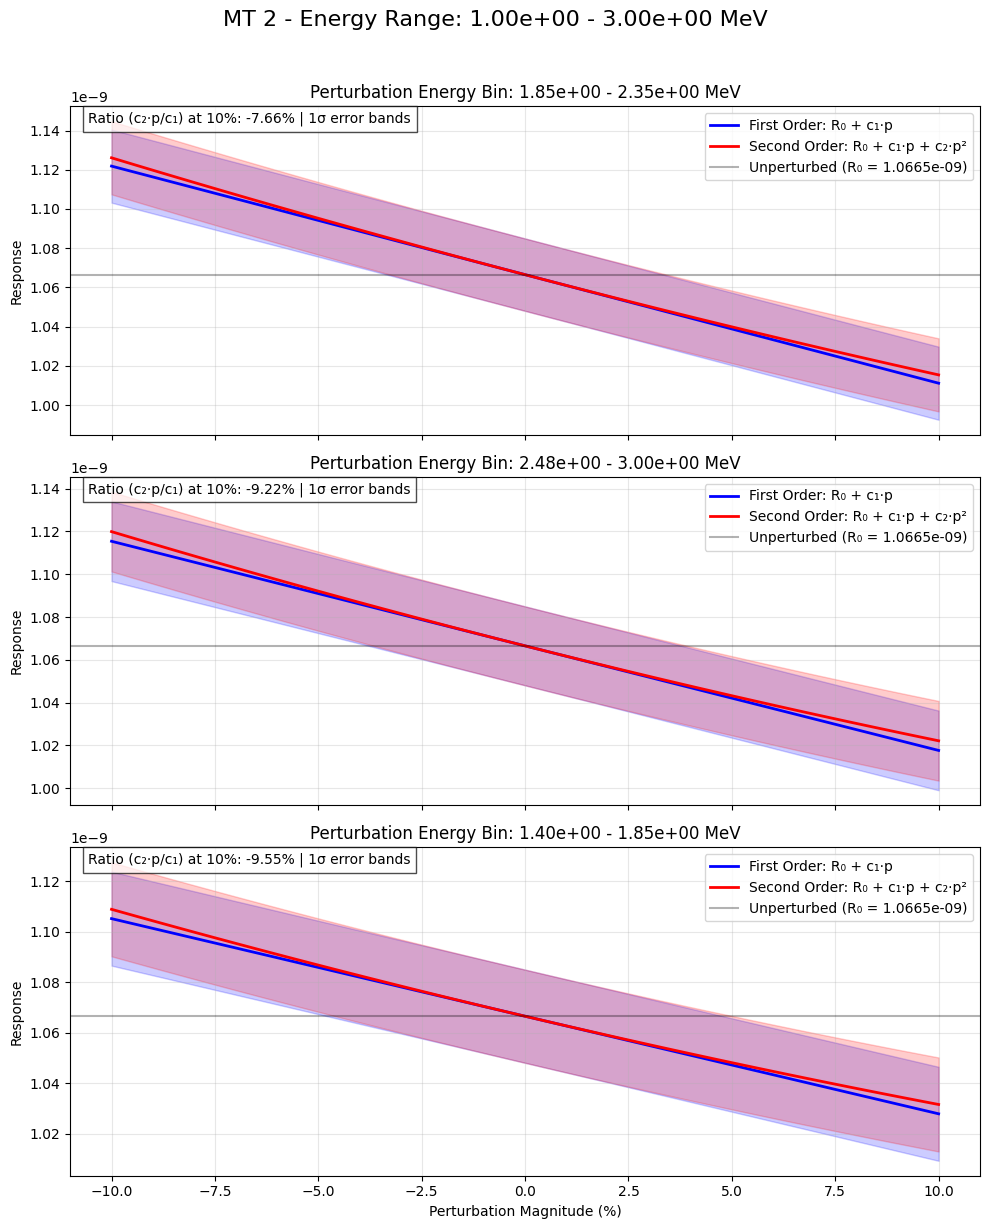

In [11]:
sensdata.plot_perturbed_response(energy='1.00e+00_3.00e+00', reaction=[2], top_n=3, p_range=[-10, 10], plot_type='comparative', n_sigma=1)

In [12]:
inputdata = mcnpy.read_mcnp(inputfile)

In [26]:
inputdata.perturbation

                   MCNP Perturbation Data                   

Number of perturbations:  1760
Perturbation numbers:     1-1760
Particle types:           n
Reactions available:      1, 2, 4, 51, 52, 102, 103, 107
Methods available:        -3, -2, 1, 2, 3
Energy range:             1.00e-11 - 2.00e+01 MeV
Number of energy bins:    44
Energy structure:         scale44


Examples of accessing data:
- .pert[perturbation_number] - Access a specific perturbation

In [14]:
perturbations = mcnpy.read_mcnp(inputfile).perturbation

In [15]:
dfpert = perturbations.to_dataframe()

In [16]:
dfpert

,particle,cell,material,rho,method,reaction,e_min,e_max
id,,,,,,,,
1,n,"3, 5, 7, 9",300001,0.160393,2,1,1.000000e-11,3.000000e-09
2,n,"3, 5, 7, 9",300001,0.160393,3,1,1.000000e-11,3.000000e-09
3,n,"3, 5, 7, 9",300001,0.160393,-2,1,1.000000e-11,3.000000e-09
4,n,"3, 5, 7, 9",300001,0.160393,-3,1,1.000000e-11,3.000000e-09
5,n,"3, 5, 7, 9",300001,0.160393,1,1,1.000000e-11,3.000000e-09
...,...,...,...,...,...,...,...,...
1756,n,"3, 5, 7, 9",300001,0.160393,2,107,8.187300e+00,2.000000e+01
1757,n,"3, 5, 7, 9",300001,0.160393,3,107,8.187300e+00,2.000000e+01
1758,n,"3, 5, 7, 9",300001,0.160393,-2,107,8.187300e+00,2.000000e+01


In [17]:
filtered_dfpert = dfpert[(dfpert['reaction'] == 1) & (dfpert['method'] == 2)]
filtered_dfpert

,particle,cell,material,rho,method,reaction,e_min,e_max
id,,,,,,,,
1,n,"3, 5, 7, 9",300001,0.160393,2,1,1.000000e-11,3.000000e-09
6,n,"3, 5, 7, 9",300001,0.160393,2,1,3.000000e-09,7.500000e-09
11,n,"3, 5, 7, 9",300001,0.160393,2,1,7.500000e-09,1.000000e-08
16,n,"3, 5, 7, 9",300001,0.160393,2,1,1.000000e-08,2.530000e-08
21,n,"3, 5, 7, 9",300001,0.160393,2,1,2.530000e-08,3.000000e-08
26,n,"3, 5, 7, 9",300001,0.160393,2,1,3.000000e-08,4.000000e-08
31,n,"3, 5, 7, 9",300001,0.160393,2,1,4.000000e-08,5.000000e-08
36,n,"3, 5, 7, 9",300001,0.160393,2,1,5.000000e-08,7.000000e-08
41,n,"3, 5, 7, 9",300001,0.160393,2,1,7.000000e-08,1.000000e-07


In [18]:
list_id = filtered_dfpert.index
print(list_id)

Index([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,  66,
        71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126, 131, 136,
       141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206,
       211, 216],
      dtype='int64', name='id')


In [19]:
for i in list(list_id):
    print(mctal.tally[4].perturbation[i].integral_error)

0.0
0.0
0.0
1.0
1.0
0.9079
1.0
0.7386
1.0
0.4076
0.3767
1.0
1.0
0.9534
0.9047
0.8147
1.0
1.0
0.2916
0.2449
0.2364
0.3106
0.2828
0.4802
0.5402
0.3799
0.2328
0.1478
0.2778
0.1772
0.1527
0.1587
0.2448
0.1076
0.0738
0.0278
0.0192
0.0154
0.0276
0.0149
0.0
0.0
0.0
0.0


In [20]:
perturbations.pert

               Perturbation Cards Collection                

Number of perturbations:  1760
Perturbation numbers:     1-1760
Particle types:           n
Reactions available:      1, 2, 4, 51, 52, 102, 103, 107
Methods available:        -3, -2, 1, 2, 3
Energy range:             1.00e-11 - 2.00e+01 MeV
Number of energy bins:    44
Energy structure:         scale44


Examples of accessing data:
- [perturbation_number] - Access a specific perturbation

In [21]:
perturbations.pert[3]

                   MCNP Perturbation Card                   

Perturbation ID: 3
Particle type:   n
Cells:           3, 5, 7, 9
Material:        300001
Density:         1.603930e-01
Method:          -2
Reaction:        1
Energy range:    1.000000e-11 - 3.000000e-09 MeV

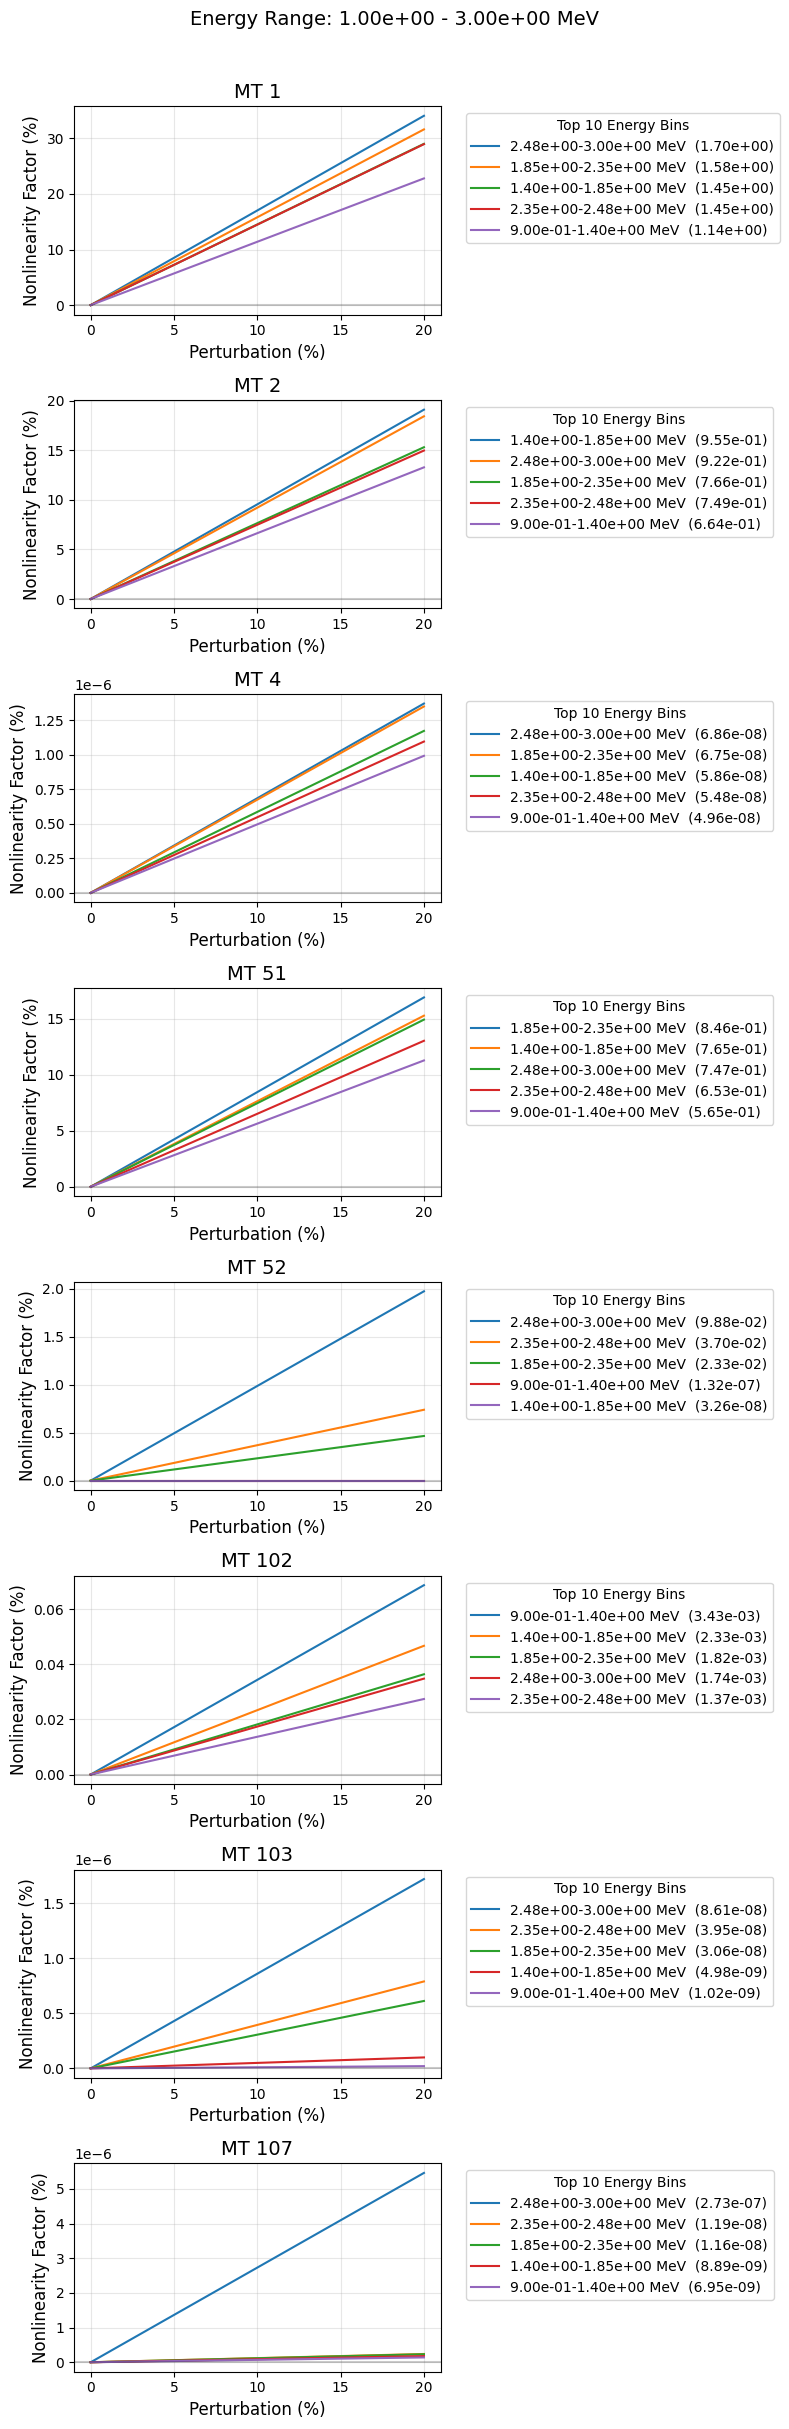

In [22]:
sensdata.plot_ratio(energy=['1.00e+00_3.00e+00'], top_n=10)

<Axes: title={'center': 'MT 51 - 1.00e+00_3.00e+00 MeV'}, xlabel='Perturbation (%)', ylabel='Nonlinearity Factor (%)'>

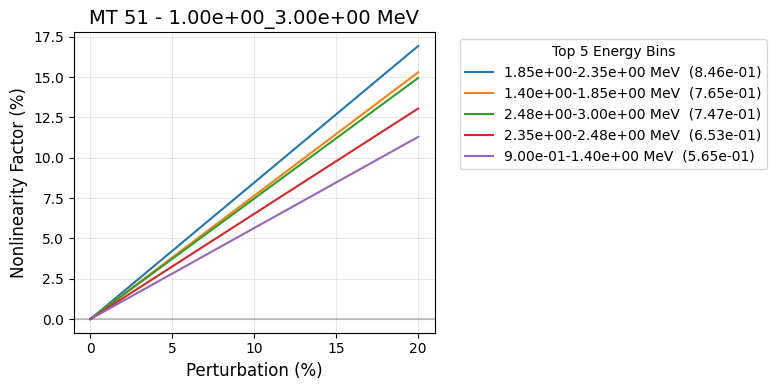

In [23]:
sensdata.ratios['1.00e+00_3.00e+00'][51].plot()

In [24]:
sensdata.data['0.00e+00_1.00e-01'][1]

             Sensitivity Coefficients             

Energy: 0.00e+00_1.00e-01
Reaction Number (MT): 1
Number of perturbation bins: 44
Unperturbed result (R₀): 2.643730e-09 ± 1.170000e-02

Data preview (values and relative errors):

     Energy Bin     |      Value      |   Rel. Error
----------------------------------------------
1.000e-11-3.000e-09 |    0.000000e+00 |     0.011700
3.000e-09-7.500e-09 |    0.000000e+00 |     0.011700
7.500e-09-1.000e-08 |    0.000000e+00 |     0.011700
...                                           
4.800e+00-6.434e+00 |    0.000000e+00 |     0.011700
6.434e+00-8.187e+00 |    0.000000e+00 |     0.011700
8.187e+00-2.000e+01 |    0.000000e+00 |     0.011700


Available methods:
- .lethargy - Get lethargy intervals as property
- .values_per_lethargy - Get sensitivity per lethargy as property
- .plot(ax=None, xlim=None) - Plot sensitivity coefficients
- .to_dataframe() - Export data as pandas DataFrame with columns:
    energy, reaction, e_lower, e_upper, s

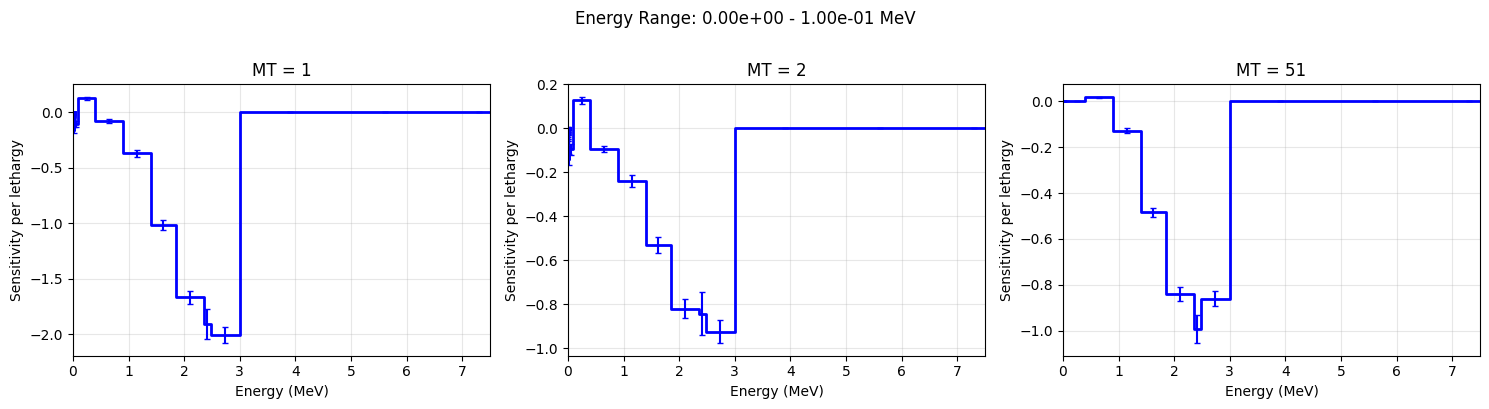

In [25]:
sensdata.plot_sensitivity(energy=['0.00e+00_1.00e-01'], reaction=[1, 2,51], xlim=[0, 7.5])